# Cronavirus cases correlation

In [54]:
# update data
!git submodule update
!cd COVID-19/; git pull

remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 11 (delta 5), reused 11 (delta 5), pack-reused 0
Unpacking objects: 100% (11/11), done.
From https://github.com/CSSEGISandData/COVID-19
   6ce13a9..3e24c26  web-data   -> origin/web-data
Already up to date.


In [40]:
import pandas as pd
import pylab

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8] # w, h

min_number_cases=100
min_number_cases_date='3/7/20'  # today date
zero_ref=100

data_folder = "./COVID-19/csse_covid_19_data/csse_covid_19_time_series"
file_name = {
    "confirmed": "{}/time_series_19-covid-Confirmed.csv".format(data_folder),
    "death": "{}/time_series_19-covid-Deaths.csv".format(data_folder),
    "recover": "{}/time_series_19-covid-Recovered.csv".format(data_folder)
}

In [49]:
def process_df(df, zero_ref=100):
    data = {}
    for country, row in df.iterrows():
        cases = row.to_list()
        new_i, zero_i = 0, 0
        start = False
        for i in range(len(cases)):
            if row[i] >= zero_ref:
                zero_i = i
                break
        new_i = [i-zero_i for i in range(len(cases))]
        data[country] = {"cases": cases, "index": new_i}
    return data    
    
def plot_dict(dict_c, xlim, xlabel, ylabel, titlestr):
    fig = plt.figure()
    plt.title(titlestr)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax = fig.add_subplot(1, 1, 1)
    for country in dict_c:
        y, x = dict_c[country]["cases"], dict_c[country]["index"]
        #plt.plot(x, y, '.-', linewidth=2, markersize=12)
        if country == 'US':
            line, = ax.plot(x, y, '*--', lw=1, color='r', label=country)
        else:
            line, = ax.plot(x, y, '.-', lw=2, label=country)
    ax.grid(which='both', b=True)
    ax.set_xlim(-xlim,+xlim)
    ax.legend()
    ax.set_yscale('log')
    pylab.show()

def plot_csv_file(file_type, min_number_cases=150, min_number_cases_date='3/6/20', zero_ref=100, xlim=15):
    file_path = file_name[file_type]
    df_c = pd.read_csv(file_path) 
    df_c = df_c.drop(['Lat', 'Long', 'Province/State'], axis=1)
    df_c = df_c.groupby(['Country/Region']).sum()
    df_c = df_c.loc[df_c[min_number_cases_date] >= min_number_cases]
    
    df_dict = process_df(df_c, zero_ref)
    
    titlestr = file_type
    xlabel = 'days since {} number of people {}'.format(min_number_cases, file_type)
    ylabel = 'people number'
    plot_dict(df_dict, xlim, xlabel, ylabel, titlestr)
    

/Users/haoyuhe/work/fastquant/goquant/env/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


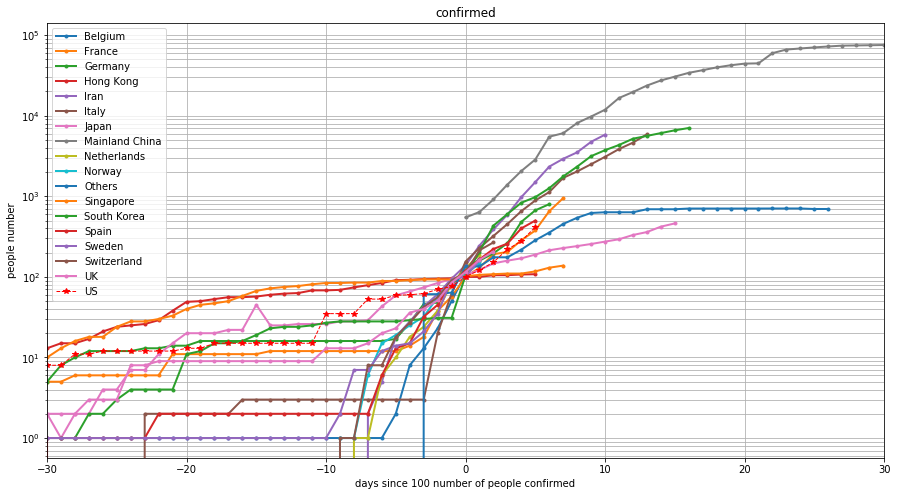

In [50]:
plot_csv_file("confirmed",
              min_number_cases=min_number_cases, 
              min_number_cases_date=min_number_cases_date, 
              zero_ref=zero_ref,
             xlim=30)

/Users/haoyuhe/work/fastquant/goquant/env/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


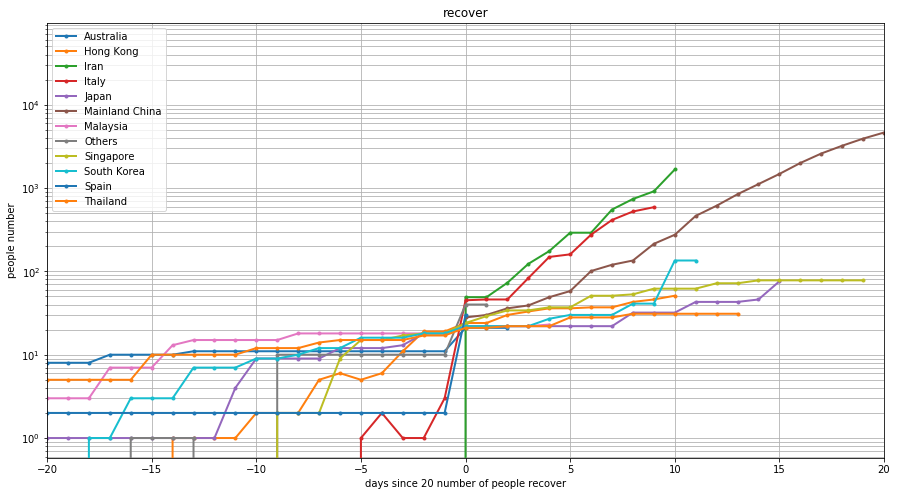

In [53]:
plot_csv_file("recover",
              min_number_cases=20, 
              min_number_cases_date=min_number_cases_date, 
              zero_ref=20,
             xlim=20)

/Users/haoyuhe/work/fastquant/goquant/env/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


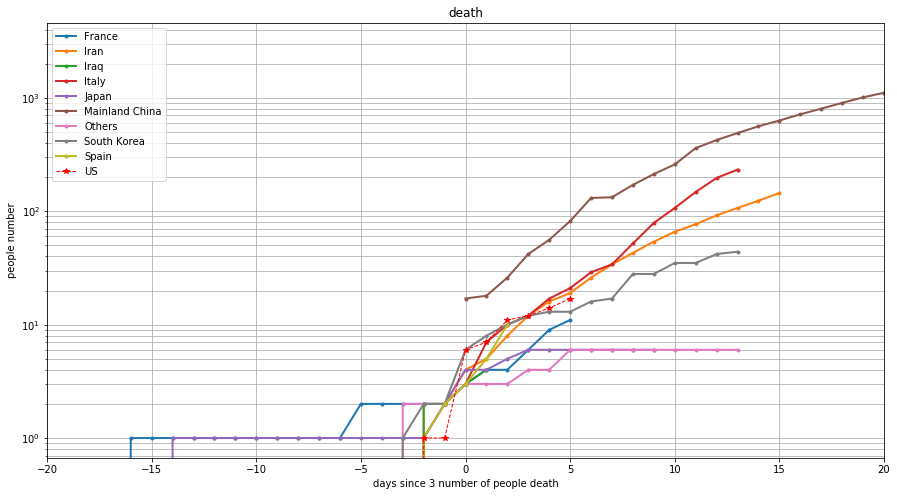

In [52]:
plot_csv_file("death",
              min_number_cases=3, 
              min_number_cases_date=min_number_cases_date, 
              zero_ref=3,
             xlim=20)